In [1]:
# Importing libraries required for the task

import wget   # Library to import online dataset
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import re  # regular expression

# Q1 importing Online file

In [2]:
url = 'https://www.kaggle.com/mansoordaku/ckdisease'  # Url of online dataset

In [3]:
#download_path = os.path.join(folder,file_name)

file_name = 'dataset.csv'
folder = '/home/passivereferral/Downloads/Ritesh_BITS'


download_path = os.path.join(folder,file_name)
wget.download(url,download_path)

'/home/passivereferral/Downloads/Ritesh_BITS/dataset (1).csv'

In [4]:
import zipfile

path_to_zip_file = '/home/passivereferral/Downloads/Ritesh_BITS/Classification/archive.zip'

directory_to_extract_to = '/home/passivereferral/Downloads/Ritesh_BITS/Classification/Assignment_4'

In [5]:
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [6]:
# Reading dataset 

df = pd.read_csv('/home/passivereferral/Downloads/Ritesh_BITS/Classification/Assignment_4/kidney_disease.csv')

In [7]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

**id** is the unique identification number to each dataset hence it is not a useful feature thus we can drop it.<br >

Apart from this some other features are having wrong datatype such as: <br >
1. pcv<br >
2. wc <br >
3. rc <br >
hence we need to change the datatype for this columns.

In [9]:
'''
df['pcv']= pd.to_numeric(df['pcv'])
df['wc']= pd.to_numeric(df['wc'])
df['rc']= pd.to_numeric(df['rc'])
'''

"\ndf['pcv']= pd.to_numeric(df['pcv'])\ndf['wc']= pd.to_numeric(df['wc'])\ndf['rc']= pd.to_numeric(df['rc'])\n"

Unusual error were being shown at position 66, 162 & 185 no. position.

In [10]:
# print position error positions row

df.loc[[66,185,162]]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
66,66,67.0,70.0,1.02,2.0,0.0,abnormal,normal,notpresent,notpresent,...,\t?,NaN,NaN,yes,yes,no,good,yes,no,ckd
185,185,4.0,NaN,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,34,\t?,NaN,no,no,no,good,no,no,ckd
162,162,59.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,37,6000,\t?,no,yes,no,good,no,no,ckd


In [11]:
# lets replace this garbage value with NaN

df.loc[[66],'pcv'] = np.nan
df.loc[[162],'rc'] = np.nan
df.loc[[185],'wc'] = np.nan


In [12]:
# print position error positions row

df.loc[[66,185,162]]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
66,66,67.0,70.0,1.02,2.0,0.0,abnormal,normal,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,yes,no,ckd
185,185,4.0,NaN,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,34,NaN,NaN,no,no,no,good,no,no,ckd
162,162,59.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,37,6000,NaN,no,yes,no,good,no,no,ckd


In [13]:
# Converting features datatype to String--> float64

df['pcv']= pd.to_numeric(df['pcv'])
df['wc']= pd.to_numeric(df['wc'])
df['rc']= pd.to_numeric(df['rc'])

In [14]:
# Column 'id' has no other signifinace than just an identity number hence it is wise to remove it

df.drop('id', axis=1 , inplace = True)

### EDA of target Variable

In [15]:
df.groupby(['classification'])['classification'].count()

classification
ckd       248
ckd\t       2
notckd    150
Name: classification, dtype: int64

In [16]:
df.replace(to_replace ="ckd\t", value ='ckd', inplace = True)

df.groupby(['classification'])['classification'].count()

classification
ckd       250
notckd    150
Name: classification, dtype: int64

 ### EDA feature variables

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [18]:
# Replacing the null value with mean for numerical features considering the target variable

lst = df.columns
lst

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [19]:
lst_cat = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad','appet', 'pe', 'ane']

lst_num = [x for x in lst if x not in lst_cat]
lst_num.remove('classification')
lst_num

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [20]:
#df.loc[df['B'] == 3, 'A'].iloc[0]
#df[cols_mode].apply(lambda x: x.fillna(x.mode, inplace=True))



for column_name in lst_num:
        
    mean = df[column_name].mean()
           
    df.fillna({column_name : mean}, inplace=True)

        
for column_name in lst_cat:
    
    mode= df[column_name].mode()[0]
           
    df.fillna({column_name : mode}, inplace=True)

    

df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [21]:
# Cleaning of Catagorical feature columns

lst_cat

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [22]:
df.rbc.unique() # No issue here

array(['normal', 'abnormal'], dtype=object)

In [23]:
df.pc.unique() # No issue here

array(['normal', 'abnormal'], dtype=object)

In [24]:
df.pcc.unique() # No issue here

array(['notpresent', 'present'], dtype=object)

In [25]:
df.ba.unique() # No issue here

array(['notpresent', 'present'], dtype=object)

In [26]:
df.htn.unique() # No issue here

array(['yes', 'no'], dtype=object)

In [27]:
df.dm.unique() # here we are having multiple catagories refering to same details

array(['yes', 'no', ' yes', '\tno', '\tyes'], dtype=object)

In [28]:
df.dm.replace(to_replace =[" yes", "\tyes"], value ="yes", inplace = True)
df.dm.replace(to_replace ="\tno", value ="no", inplace = True)

df.dm.unique() 

array(['yes', 'no'], dtype=object)

In [29]:
df.cad.unique() # here we are having multiple catagories refering to same details

array(['no', 'yes', '\tno'], dtype=object)

In [30]:
df.cad.replace(to_replace =["\tno"], value ="no", inplace = True)

df.cad.unique()

array(['no', 'yes'], dtype=object)

In [31]:
df.appet.unique() # No issue here

array(['good', 'poor'], dtype=object)

In [32]:
df.appet.unique() # No issue here

array(['good', 'poor'], dtype=object)

In [33]:
df.ane.unique() # No issue here

array(['no', 'yes'], dtype=object)

# Q5 Feature Scaling  : MaxAbsScaler

In [34]:
#Importing required libraries
from sklearn.preprocessing import MaxAbsScaler

In [35]:
#Creating object of MinMaxScalar Class

abs_scaler = MaxAbsScaler()


In [36]:
A = df.columns
A

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [37]:
lst_cat

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [38]:
lst_num_ = ['age', 'bp', 'sg', 'al', 'su','bgr', 'bu','sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

In [39]:
#Listing Numerical Columns for transformation
B = lst_num_

#Transforming numerical columns
df[B] =abs_scaler.fit_transform(df[B])

# Q3 Visualize the dataset using any two appropriate graphs

### Visualisation of Catagorical features

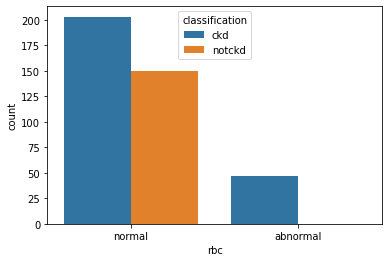

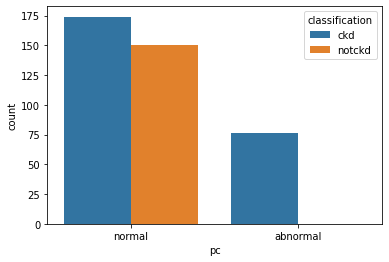

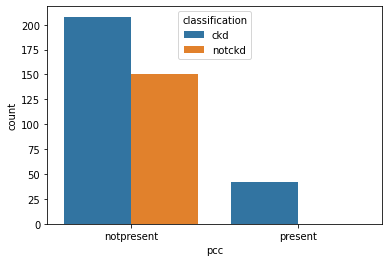

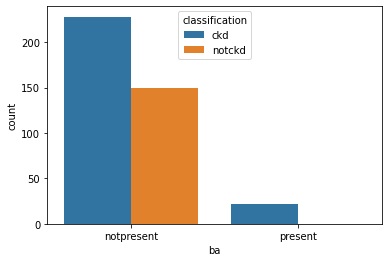

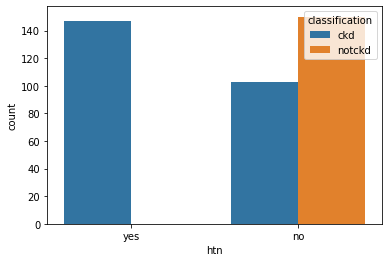

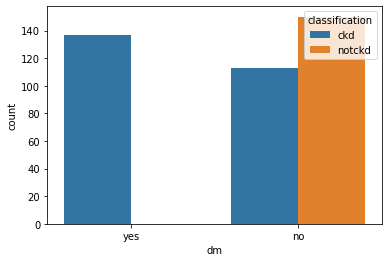

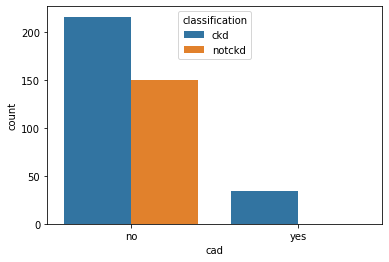

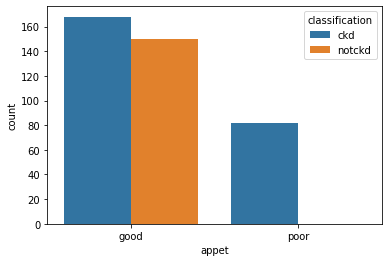

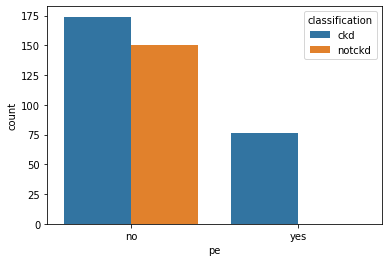

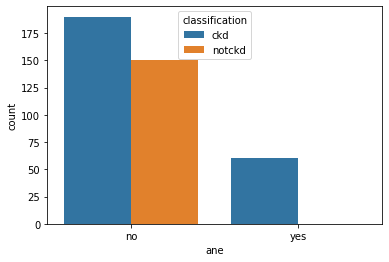

In [40]:
# barplot for catagorical features

for i in lst_cat:
    sns.countplot(x = i, hue = 'classification',data = df)
    plt.show()

### Observations: <br >
1. 'rbc' ubnormal represents 'ckd'.<br >
2. 'pc' ubnormal represents 'ckd'.<br >
3. 'pcc' present represents 'ckd'.<br >
4. 'ba' present represents 'ckd'.<br >
5. 'htn' yes represents 'ckd'<br >
6. 'dm' yes represents 'ckd'<br >
7. 'cad' yes represents 'ckd'<br >
8. 'appet' poor represents 'ckd'<br >
9. 'pe' yes represents 'ckd'<br >
10. 'ane' yes represents 'ckd'<br >


### Visualisation of Numerical features

In [41]:
df1=df.drop(lst_cat, axis = 1, inplace = False)

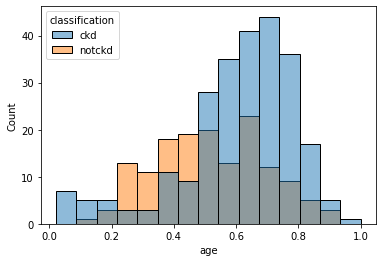

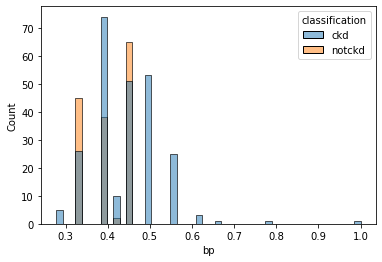

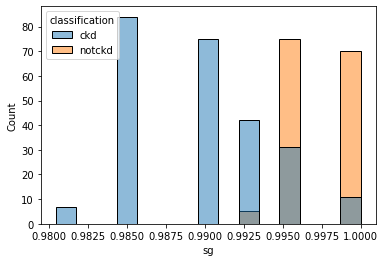

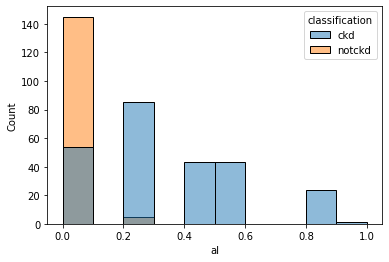

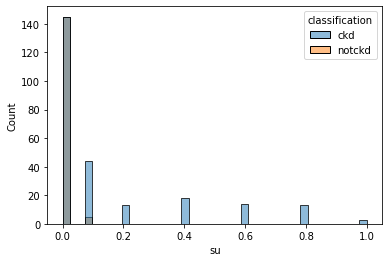

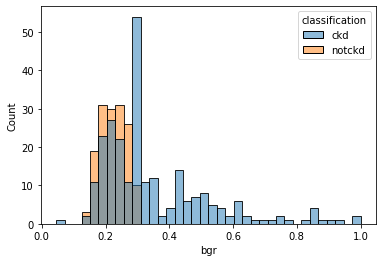

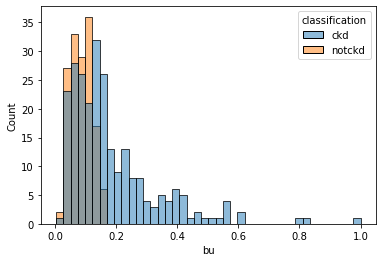

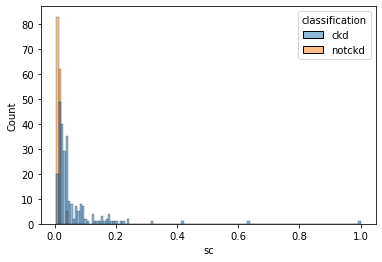

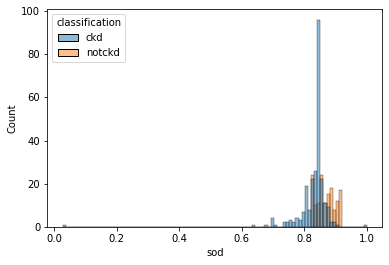

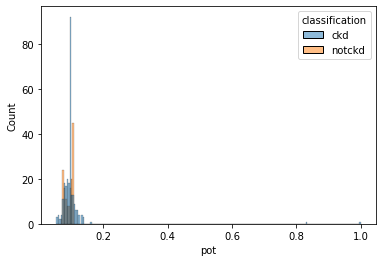

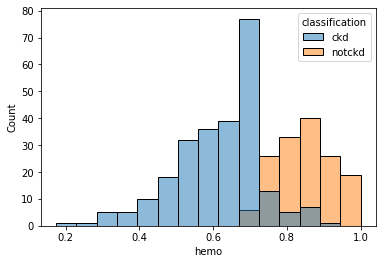

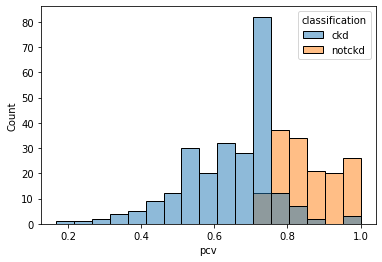

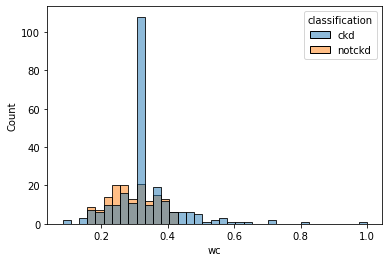

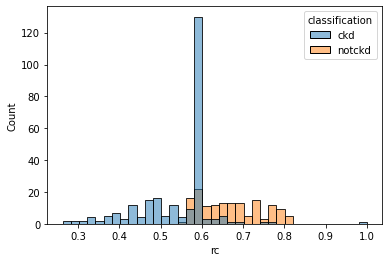

In [42]:

for i in lst_num:
    
    sns.histplot(data=df1, x=i, hue = 'classification') 
    plt.show()

### Observations: <br >
1. 'sg' on higher side may cause 'ckd'.<br >
2. 'al' on lower side may signify less chances of 'ckd'.<br >
3. 'bgr' on higher side may cause 'ckd'.<br >
4. 'hemo'on lower side may signify high chances of 'ckd'.<br >
5. 'pcv'on lower side may signify high chances of 'ckd'.<br >
6. 'rc'on lower side may signify high chances of 'ckd'.<br >


### <br > Apart from the above observations it has been observed that some of the features are having skewed distribution hence it is wise to use **log transformation.**<br >
**['bgr', 'bu', 'sc' , 'sod','pot','wc', 'bp','al','su','hemo']**

In [43]:
'''
# Log2 transformation of the skewed continuous features such as :

# ['bgr', 'bu', 'sc' , 'sod','pot','wc', 'bp','al','su','hemo']

lst_transform = ['bgr', 'bu', 'sc' , 'sod','pot','wc', 'bp','al','hemo']

for k in lst_transform:
    
    df[k] = np.log2(df[k])
'''

"\n# Log2 transformation of the skewed continuous features such as :\n\n# ['bgr', 'bu', 'sc' , 'sod','pot','wc', 'bp','al','su','hemo']\n\nlst_transform = ['bgr', 'bu', 'sc' , 'sod','pot','wc', 'bp','al','hemo']\n\nfor k in lst_transform:\n    \n    df[k] = np.log2(df[k])\n"

# Q2 Splitting the data into X & Y

In [44]:
# splitting of data in X & Y column

Y = df['classification']
    
X = df.drop(['classification'], axis =1)

In [45]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.533333,0.444444,0.995122,0.2,0.0,normal,normal,notpresent,notpresent,0.246939,...,0.865169,0.814815,0.295455,0.650000,yes,yes,no,good,no,no
1,0.077778,0.277778,0.995122,0.8,0.0,normal,normal,notpresent,notpresent,0.302115,...,0.634831,0.703704,0.227273,0.588429,no,no,no,good,no,no
2,0.688889,0.444444,0.985366,0.4,0.6,normal,normal,notpresent,notpresent,0.863265,...,0.539326,0.574074,0.284091,0.588429,no,yes,no,poor,no,yes
3,0.533333,0.388889,0.980488,0.8,0.0,normal,abnormal,present,notpresent,0.238776,...,0.629213,0.592593,0.253788,0.487500,yes,no,no,poor,yes,yes
4,0.566667,0.444444,0.985366,0.4,0.0,normal,normal,notpresent,notpresent,0.216327,...,0.651685,0.648148,0.276515,0.575000,no,no,no,good,no,no


In [46]:
Y.head()

0    ckd
1    ckd
2    ckd
3    ckd
4    ckd
Name: classification, dtype: object

We are having 2 target variables here: <br >
1. ckd<br >
2. notckd<br >


for the convenience of the model training we are encoding it.
1. ckd : 1<br >
2. notckd : 0<br >

In [47]:
Y.replace(to_replace ="ckd", value =1, inplace = True)
Y.replace(to_replace ="notckd", value =0, inplace = True)

Y.unique()

array([1, 0])

# Q4 Correlation- Heatmap

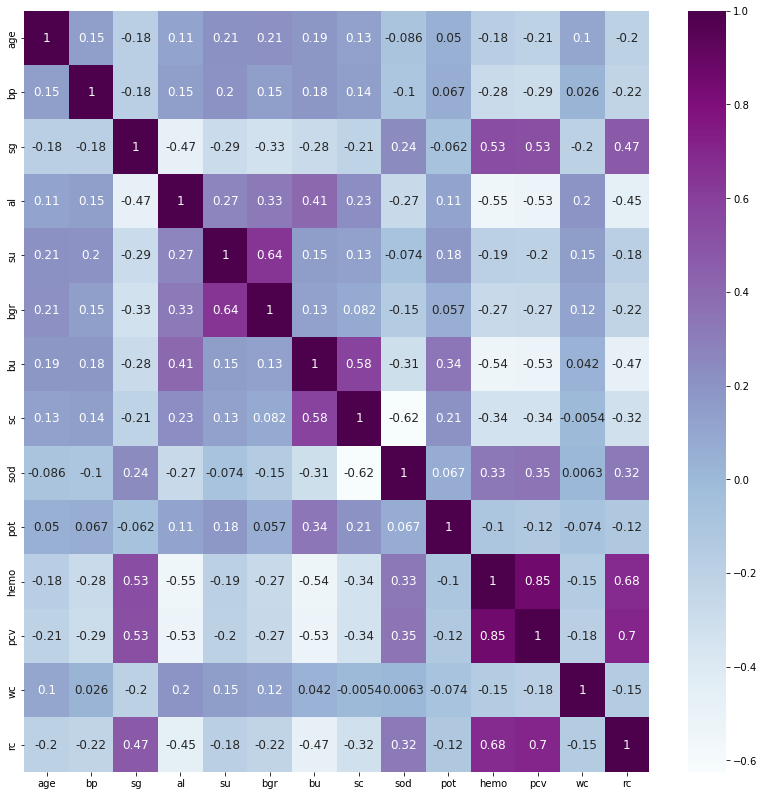

In [48]:
corr = X.corr() # corrlation matrix

fig, ax = plt.subplots(figsize=(14,14))     

heat = sns.heatmap(corr,annot=True,annot_kws={'size':12},cmap='BuPu')

plt.show()

As per the above correlation heatmap:<br >
1. 'sc' & 'bu' are correleted<br >
2. 'hemo' & 'pcv' are correleted<br >
1. 'rc' & 'pcv' are correleted <br >

Hence we can reduce the features: **'bu' , 'pcv' and 'rc'**

In [49]:
# Reducing feature 'bu' , 'pcv' and 'rc'

X = X.drop(['bu','pcv','rc'] , axis = 1)

In [50]:
X.shape

(400, 21)

# Q6 Splitting the dataset

In [51]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [52]:
X.dm.unique() # here we are having multiple catagories refering to same details

X.dm.replace(to_replace ="yes", value =1, inplace = True)
X.dm.replace(to_replace ="no", value =0, inplace = True)

X.rbc.replace(to_replace ="normal", value =1, inplace = True)
X.rbc.replace(to_replace ="abnormal", value =0, inplace = True)

X.pc.replace(to_replace ="normal", value =1, inplace = True)
X.pc.replace(to_replace ="abnormal", value =0, inplace = True)

X.pcc.replace(to_replace ="present", value =1, inplace = True)
X.pcc.replace(to_replace ="notpresent", value =0, inplace = True)

X.ba.replace(to_replace ="present", value =1, inplace = True)
X.ba.replace(to_replace ="notpresent", value =0, inplace = True)

X.htn.replace(to_replace ="yes", value =1, inplace = True)
X.htn.replace(to_replace ="no", value =0, inplace = True)

X.cad.replace(to_replace ="yes", value =1, inplace = True)
X.cad.replace(to_replace ="no", value =0, inplace = True)

X.pe.replace(to_replace ="yes", value =1, inplace = True)
X.pe.replace(to_replace ="no", value =0, inplace = True)

X.ane.replace(to_replace ="yes", value =1, inplace = True)
X.ane.replace(to_replace ="no", value =0, inplace = True)

X.appet.replace(to_replace ="good", value =1, inplace = True)
X.appet.replace(to_replace ="poor", value =0, inplace = True)

In [53]:
# splitting the data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 60)

### Generating Model

In [66]:
#Import svm model
from sklearn import svm
from sklearn.svm import SVC

In [67]:
#Create a svm Classifier
model_svm = svm.SVC(kernel='linear') # Linear Kernel
acc_score = []

In [68]:
def get_score(model, x_train , x_test , y_train , y_test):
    
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [69]:
get_score(model_svm , x_train , x_test , y_train , y_test)

0.9125

# Q7 : 5 fold cross validation

In [70]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [71]:
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)

# Q8 Training SVM model

In [72]:
scores_svm = []

In [74]:
for train_index, test_index in kf.split(X,Y):
    x_train , x_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
      
    scores_svm.append(get_score(SVC(gamma='auto'), x_train, x_test, y_train, y_test))
    



[0.875, 0.875, 0.8, 1.0, 1.0, 0.875, 0.875, 0.8, 1.0, 1.0]

 # Q9 Classification report & confusion matrix

In [79]:
scores_svm

[0.875, 0.875, 0.8, 1.0, 1.0, 0.875, 0.875, 0.8, 1.0, 1.0]

In [80]:
avg_score = sum(scores_svm)/len(scores_svm)

avg_score

0.9099999999999999